In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('rawnyc.csv')

In [4]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,4/1/2020 0:41,4/1/2020 1:01,1,1.20,1,41,24,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
1,4/1/2020 0:56,4/1/2020 1:09,1,3.40,1,95,197,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0
2,4/1/2020 0:00,4/1/2020 0:09,1,2.80,1,237,137,1,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
3,4/1/2020 0:24,4/1/2020 0:34,1,2.60,1,68,142,1,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
4,4/1/2020 0:13,4/1/2020 0:18,1,1.44,1,263,74,1,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006906 entries, 0 to 1006905
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   tpep_pickup_datetime   1006906 non-null  object 
 1   tpep_dropoff_datetime  1006906 non-null  object 
 2   passenger_count        1006906 non-null  int64  
 3   trip_distance          1006906 non-null  float64
 4   RatecodeID             1006906 non-null  int64  
 5   PULocationID           1006906 non-null  int64  
 6   DOLocationID           1006906 non-null  int64  
 7   payment_type           1006906 non-null  int64  
 8   fare_amount            1006906 non-null  float64
 9   extra                  1006906 non-null  float64
 10  mta_tax                1006906 non-null  float64
 11  tip_amount             1006906 non-null  float64
 12  tolls_amount           1006906 non-null  float64
 13  improvement_surcharge  1006906 non-null  float64
 14  total_amount      

Tasks:
1. Need to change timestamp fields from object to datetime
2. Adding date time columns such as day of month, year, month, day of week

In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
                                             #, format="%m/%d/%Y %I:%M:%S %p")

In [8]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
                                           #, format="%m/%d/%Y %I:%M:%S %p")

In [10]:
df.rename(columns={'tpep_pickup_datetime':'TripStart','tpep_dropoff_datetime':'TripEnd'}, inplace = True)

In [13]:
dateFeats = ['TripStart','TripEnd']

In [21]:
for feat in dateFeats:
    df[feat+'_date'] = df[feat].dt.date
    df[feat+'_dayofmonth'] = df[feat].dt.day
    df[feat+'_month'] = df[feat].dt.month
    df[feat+'_year'] = df[feat].dt.year
    df[feat+'_dayofweek'] = df[feat].dt.dayofweek
    df[feat+'_week'] = df[feat].dt.week
    df[feat+'_time'] = df[feat].dt.time
    df[feat+'_hourofday'] = df[feat].dt.hour
    df[feat+'_minuteofday'] = df[feat].dt.minute

In [24]:
df.shape

(1006906, 34)

### Analyze NULL values

In [17]:
df.isnull().sum()

TripStart                0
TripEnd                  0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
TripStart_dayofmonth     0
TripStart_month          0
TripStart_year           0
TripStart_dayofweek      0
TripStart_week           0
TripStart_time           0
TripStart_hourofday      0
TripStart_minuteofday    0
TripEnd_dayofmonth       0
TripEnd_month            0
TripEnd_year             0
TripEnd_dayofweek        0
TripEnd_week             0
TripEnd_time             0
TripEnd_hourofday        0
TripEnd_minuteofday      0
dtype: int64

## No nulls. Clean data

# Check correlation matrix

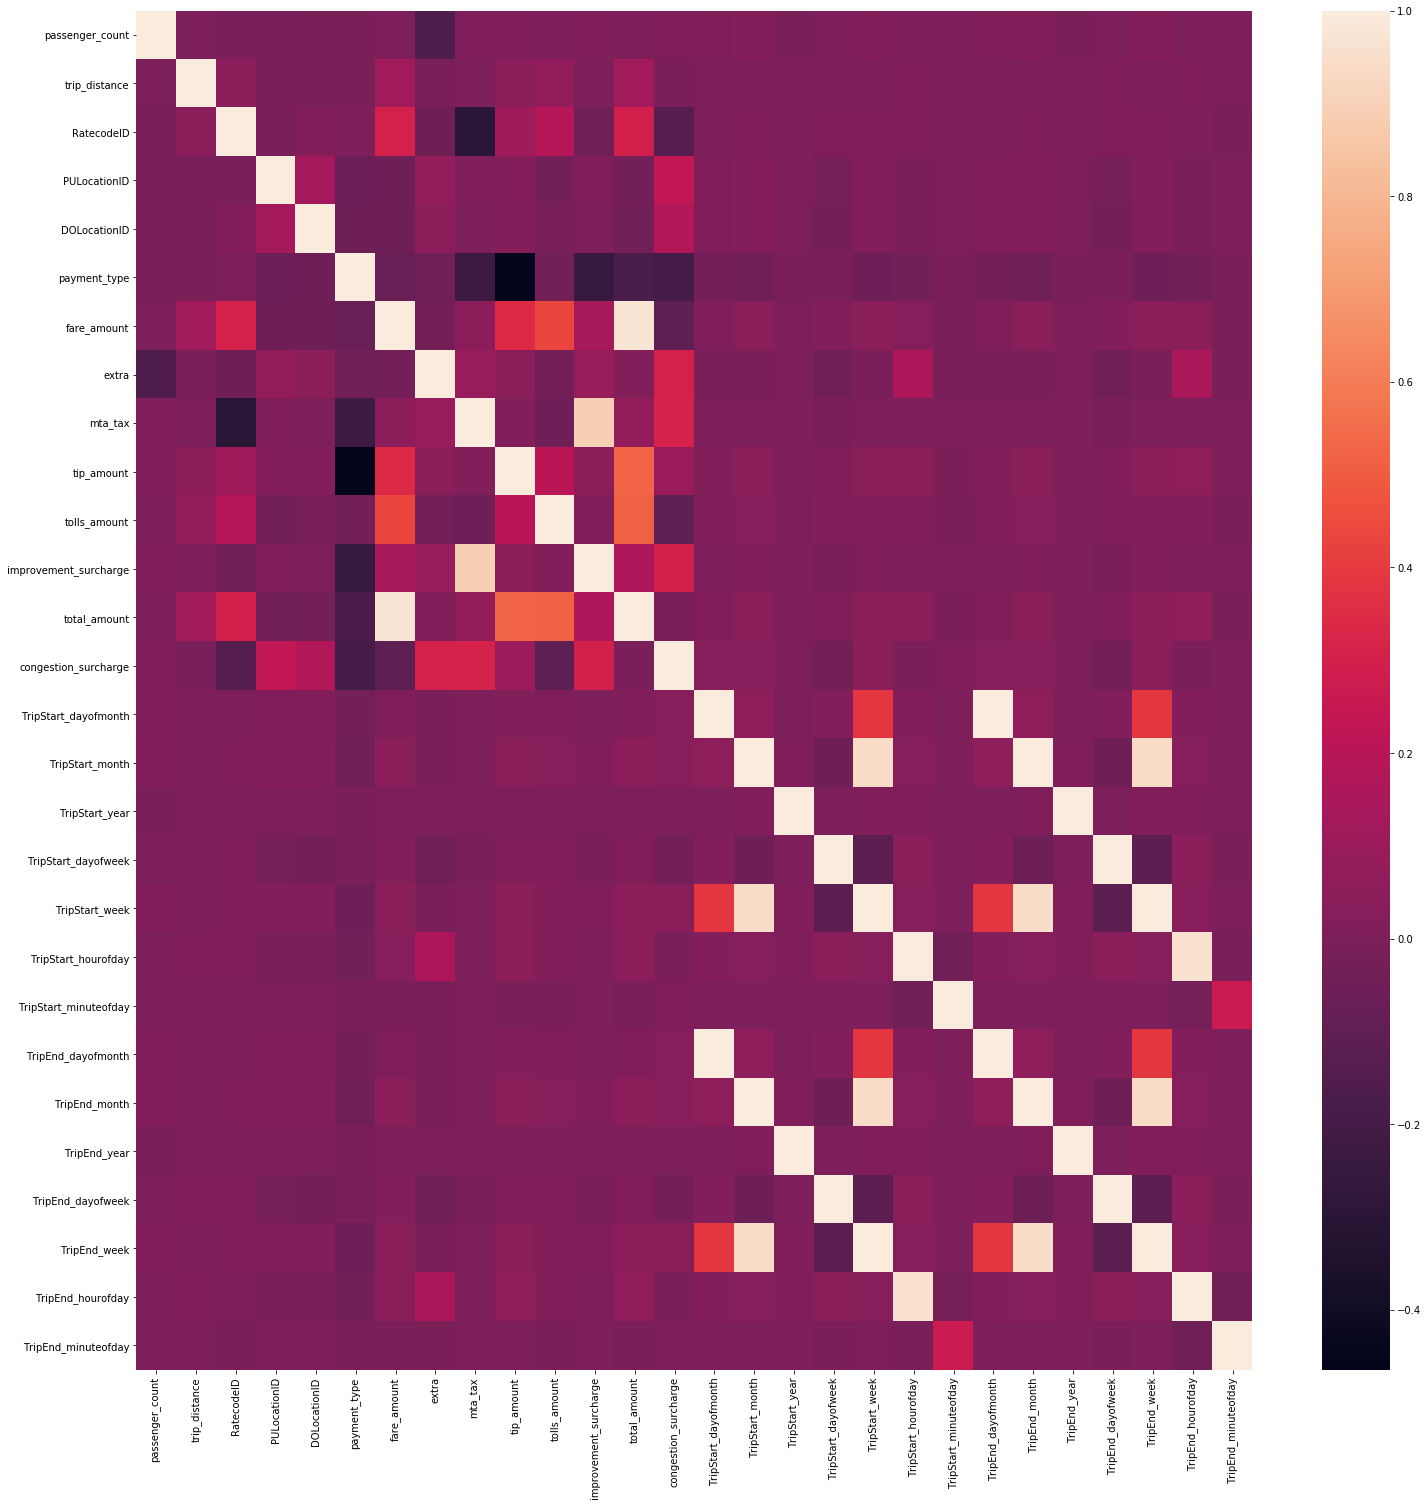

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())

In [25]:
taxi_df = pd.read_csv('taxi_zone_lookup.csv')

In [26]:
taxi_df.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [49]:
merged = pd.merge(df, taxi_df, left_on = 'PULocationID',right_on = 'LocationID', how = 'inner')

In [50]:
merged.head()

,TripStart,TripEnd,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,TripStart_dayofmonth,TripStart_month,TripStart_year,TripStart_dayofweek,TripStart_week,TripStart_time,TripStart_hourofday,TripStart_minuteofday,TripEnd_dayofmonth,TripEnd_month,TripEnd_year,TripEnd_dayofweek,TripEnd_week,TripEnd_time,TripEnd_hourofday,TripEnd_minuteofday,TripStart_date,TripEnd_date,LocationID,Borough,Zone
0,2020-04-01 00:41:00,2020-04-01 01:01:00,1,1.20,1,41,24,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0,1,4,2020,2,14,00:41:00,0,41,1,4,2020,2,14,01:01:00,1,1,2020-04-01,2020-04-01,41,Manhattan,Central Harlem
1,2020-04-01 00:46:00,2020-04-01 00:51:00,1,1.00,1,41,43,1,6.0,0.5,0.5,1.0,0.0,0.3,8.3,0.0,1,4,2020,2,14,00:46:00,0,46,1,4,2020,2,14,00:51:00,0,51,2020-04-01,2020-04-01,41,Manhattan,Central Harlem
2,2020-04-01 00:36:00,2020-04-01 00:46:00,1,2.50,1,41,42,2,10.5,0.5,0.5,0.0,0.0,0.3,11.8,0.0,1,4,2020,2,14,00:36:00,0,36,1,4,2020,2,14,00:46:00,0,46,2020-04-01,2020-04-01,41,Manhattan,Central Harlem
3,2020-04-01 00:49:00,2020-04-01 00:51:00,1,0.57,1,41,43,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3,0.0,1,4,2020,2,14,00:49:00,0,49,1,4,2020,2,14,00:51:00,0,51,2020-04-01,2020-04-01,41,Manhattan,Central Harlem
4,2020-04-01 01:48:00,2020-04-01 01:58:00,5,2.80,1,41,42,2,11.0,0.5,0.5,0.0,0.0,0.3,12.3,0.0,1,4,2020,2,14,01:48:00,1,48,1,4,2020,2,14,01:58:00,1,58,2020-04-01,2020-04-01,41,Manhattan,Central Harlem


In [51]:
merged.rename(columns={'Borough':'PickupBorough','Zone':'PickupZone'}, inplace = True)

In [52]:
merged.drop('LocationID', axis = 1, inplace = True)

In [53]:
merged.head()

,TripStart,TripEnd,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,TripStart_dayofmonth,TripStart_month,TripStart_year,TripStart_dayofweek,TripStart_week,TripStart_time,TripStart_hourofday,TripStart_minuteofday,TripEnd_dayofmonth,TripEnd_month,TripEnd_year,TripEnd_dayofweek,TripEnd_week,TripEnd_time,TripEnd_hourofday,TripEnd_minuteofday,TripStart_date,TripEnd_date,PickupBorough,PickupZone
0,2020-04-01 00:41:00,2020-04-01 01:01:00,1,1.20,1,41,24,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0,1,4,2020,2,14,00:41:00,0,41,1,4,2020,2,14,01:01:00,1,1,2020-04-01,2020-04-01,Manhattan,Central Harlem
1,2020-04-01 00:46:00,2020-04-01 00:51:00,1,1.00,1,41,43,1,6.0,0.5,0.5,1.0,0.0,0.3,8.3,0.0,1,4,2020,2,14,00:46:00,0,46,1,4,2020,2,14,00:51:00,0,51,2020-04-01,2020-04-01,Manhattan,Central Harlem
2,2020-04-01 00:36:00,2020-04-01 00:46:00,1,2.50,1,41,42,2,10.5,0.5,0.5,0.0,0.0,0.3,11.8,0.0,1,4,2020,2,14,00:36:00,0,36,1,4,2020,2,14,00:46:00,0,46,2020-04-01,2020-04-01,Manhattan,Central Harlem
3,2020-04-01 00:49:00,2020-04-01 00:51:00,1,0.57,1,41,43,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3,0.0,1,4,2020,2,14,00:49:00,0,49,1,4,2020,2,14,00:51:00,0,51,2020-04-01,2020-04-01,Manhattan,Central Harlem
4,2020-04-01 01:48:00,2020-04-01 01:58:00,5,2.80,1,41,42,2,11.0,0.5,0.5,0.0,0.0,0.3,12.3,0.0,1,4,2020,2,14,01:48:00,1,48,1,4,2020,2,14,01:58:00,1,58,2020-04-01,2020-04-01,Manhattan,Central Harlem


In [54]:
merged = pd.merge(merged, taxi_df, left_on = 'DOLocationID',right_on = 'LocationID', how = 'inner')

In [55]:
merged.rename(columns={'Borough':'DropoffBorough','Zone':'DropoffZone'}, inplace = True)

In [56]:
merged.drop('LocationID', axis = 1, inplace = True)

In [57]:
merged.head()

,TripStart,TripEnd,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,TripStart_dayofmonth,TripStart_month,TripStart_year,TripStart_dayofweek,TripStart_week,TripStart_time,TripStart_hourofday,TripStart_minuteofday,TripEnd_dayofmonth,TripEnd_month,TripEnd_year,TripEnd_dayofweek,TripEnd_week,TripEnd_time,TripEnd_hourofday,TripEnd_minuteofday,TripStart_date,TripEnd_date,PickupBorough,PickupZone,DropoffBorough,DropoffZone
0,2020-04-01 00:41:00,2020-04-01 01:01:00,1,1.20,1,41,24,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0,1,4,2020,2,14,00:41:00,0,41,1,4,2020,2,14,01:01:00,1,1,2020-04-01,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale
1,2020-04-01 16:59:00,2020-04-01 17:09:00,1,1.63,1,41,24,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8,0.0,1,4,2020,2,14,16:59:00,16,59,1,4,2020,2,14,17:09:00,17,9,2020-04-01,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale
2,2020-04-02 14:43:00,2020-04-02 14:46:00,1,0.54,1,41,24,2,4.5,0.0,0.5,0.0,0.0,0.3,5.3,0.0,2,4,2020,3,14,14:43:00,14,43,2,4,2020,3,14,14:46:00,14,46,2020-04-02,2020-04-02,Manhattan,Central Harlem,Manhattan,Bloomingdale
3,2020-04-02 15:48:00,2020-04-02 15:54:00,1,1.24,1,41,24,1,6.5,0.0,0.5,4.0,0.0,0.3,11.3,0.0,2,4,2020,3,14,15:48:00,15,48,2,4,2020,3,14,15:54:00,15,54,2020-04-02,2020-04-02,Manhattan,Central Harlem,Manhattan,Bloomingdale
4,2020-04-02 15:02:00,2020-04-02 15:10:00,1,1.30,1,41,24,1,8.0,0.0,0.5,1.0,0.0,0.3,9.8,0.0,2,4,2020,3,14,15:02:00,15,2,2,4,2020,3,14,15:10:00,15,10,2020-04-02,2020-04-02,Manhattan,Central Harlem,Manhattan,Bloomingdale


In [58]:
merged.shape

(1006906, 38)

In [66]:
weather = pd.read_excel('weather.xlsx')

In [67]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            91 non-null     datetime64[ns]
 1   Max Temp        91 non-null     int64         
 2   Min Temp        91 non-null     int64         
 3   Avg Temp        91 non-null     float64       
 4   Departure Temp  91 non-null     float64       
 5   HDD             91 non-null     int64         
 6   CDD             91 non-null     int64         
 7   Precipitation   91 non-null     object        
 8   New Snow        91 non-null     object        
 9   Snow Depth      91 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 7.2+ KB


In [63]:
weather.head()

,Date,Max Temp,Min Temp,Avg Temp,Departure Temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
1,2020-04-02,58,38,48.0,-0.2,17,0,0,0,0
2,2020-04-03,52,45,48.5,-0.1,16,0,0.13,0,0
3,2020-04-04,62,46,54.0,5.1,11,0,0.02,0,0
4,2020-04-05,65,47,56.0,6.7,9,0,0,0,0


In [68]:
merged['TripStart_date'] = pd.to_datetime(merged['TripStart_date'])

In [69]:
merged = pd.merge(merged, weather, left_on = 'TripStart_date',right_on = 'Date', how = 'inner')

In [70]:
merged.head(20)

,TripStart,TripEnd,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,TripStart_dayofmonth,TripStart_month,TripStart_year,TripStart_dayofweek,TripStart_week,TripStart_time,TripStart_hourofday,TripStart_minuteofday,TripEnd_dayofmonth,TripEnd_month,TripEnd_year,TripEnd_dayofweek,TripEnd_week,TripEnd_time,TripEnd_hourofday,TripEnd_minuteofday,TripStart_date,TripEnd_date,PickupBorough,PickupZone,DropoffBorough,DropoffZone,Date,Max Temp,Min Temp,Avg Temp,Departure Temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2020-04-01 00:41:00,2020-04-01 01:01:00,1,1.20,1,41,24,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,1,4,2020,2,14,00:41:00,0,41,1,4,2020,2,14,01:01:00,1,1,2020-04-01,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
1,2020-04-01 16:59:00,2020-04-01 17:09:00,1,1.63,1,41,24,2,9.0,1.0,0.5,0.00,0.0,0.3,10.80,0.0,1,4,2020,2,14,16:59:00,16,59,1,4,2020,2,14,17:09:00,17,9,2020-04-01,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
2,2020-04-01 10:27:00,2020-04-01 10:44:00,1,4.60,1,68,24,2,16.5,0.0,0.5,0.00,0.0,0.3,19.80,2.5,1,4,2020,2,14,10:27:00,10,27,1,4,2020,2,14,10:44:00,10,44,2020-04-01,2020-04-01,Manhattan,East Chelsea,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
3,2020-04-01 12:43:00,2020-04-01 12:47:00,1,1.30,1,75,24,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,0.0,1,4,2020,2,14,12:43:00,12,43,1,4,2020,2,14,12:47:00,12,47,2020-04-01,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
4,2020-04-01 13:58:00,2020-04-01 14:10:00,1,1.60,1,75,24,3,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0.0,1,4,2020,2,14,13:58:00,13,58,1,4,2020,2,14,14:10:00,14,10,2020-04-01,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
5,2020-04-01 14:07:00,2020-04-01 14:17:00,1,0.00,1,75,24,1,6.2,0.0,0.5,0.37,0.0,0.3,7.37,0.0,1,4,2020,2,14,14:07:00,14,7,1,4,2020,2,14,14:17:00,14,17,2020-04-01,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
6,2020-04-01 17:39:00,2020-04-01 17:48:00,1,1.56,1,75,24,2,8.5,1.0,0.5,0.00,0.0,0.3,10.30,0.0,1,4,2020,2,14,17:39:00,17,39,1,4,2020,2,14,17:48:00,17,48,2020-04-01,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
7,2020-04-01 19:04:00,2020-04-01 19:15:00,1,1.40,1,75,24,1,9.0,1.0,0.5,0.11,0.0,0.3,10.91,0.0,1,4,2020,2,14,19:04:00,19,4,1,4,2020,2,14,19:15:00,19,15,2020-04-01,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
8,2020-04-01 12:17:00,2020-04-01 12:32:00,1,3.48,1,141,24,1,13.5,0.0,0.5,3.36,0.0,0.3,20.16,2.5,1,4,2020,2,14,12:17:00,12,17,1,4,2020,2,14,12:32:00,12,32,2020-04-01,2020-04-01,Manhattan,Lenox Hill West,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
9,2020-04-01 10:14:00,2020-04-01 10:36:00,1,5.39,1,137,24,1,19.5,0.0,0.5,6.84,0.0,0.3,29.64,2.5,1,4,2020,2,14,10:14:00,10,14,1,4,2020,2,14,10:36:00,10,36,2020-04-01,2020-04-01,Manhattan,Kips Bay,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0


In [71]:
merged.shape

(1006755, 48)

In [72]:
df = merged.copy()

In [73]:
df.head()

,TripStart,TripEnd,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,TripStart_dayofmonth,TripStart_month,TripStart_year,TripStart_dayofweek,TripStart_week,TripStart_time,TripStart_hourofday,TripStart_minuteofday,TripEnd_dayofmonth,TripEnd_month,TripEnd_year,TripEnd_dayofweek,TripEnd_week,TripEnd_time,TripEnd_hourofday,TripEnd_minuteofday,TripStart_date,TripEnd_date,PickupBorough,PickupZone,DropoffBorough,DropoffZone,Date,Max Temp,Min Temp,Avg Temp,Departure Temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2020-04-01 00:41:00,2020-04-01 01:01:00,1,1.20,1,41,24,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,1,4,2020,2,14,00:41:00,0,41,1,4,2020,2,14,01:01:00,1,1,2020-04-01,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
1,2020-04-01 16:59:00,2020-04-01 17:09:00,1,1.63,1,41,24,2,9.0,1.0,0.5,0.00,0.0,0.3,10.80,0.0,1,4,2020,2,14,16:59:00,16,59,1,4,2020,2,14,17:09:00,17,9,2020-04-01,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
2,2020-04-01 10:27:00,2020-04-01 10:44:00,1,4.60,1,68,24,2,16.5,0.0,0.5,0.00,0.0,0.3,19.80,2.5,1,4,2020,2,14,10:27:00,10,27,1,4,2020,2,14,10:44:00,10,44,2020-04-01,2020-04-01,Manhattan,East Chelsea,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
3,2020-04-01 12:43:00,2020-04-01 12:47:00,1,1.30,1,75,24,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,0.0,1,4,2020,2,14,12:43:00,12,43,1,4,2020,2,14,12:47:00,12,47,2020-04-01,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0
4,2020-04-01 13:58:00,2020-04-01 14:10:00,1,1.60,1,75,24,3,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0.0,1,4,2020,2,14,13:58:00,13,58,1,4,2020,2,14,14:10:00,14,10,2020-04-01,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,2020-04-01,56,38,47.0,-0.8,18,0,0,0,0


In [74]:
df.drop('Date', axis = 1, inplace = True)

In [75]:
df.to_csv('nyccleaned.csv')